In [1]:
%matplotlib widget

In [2]:
import lysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
e = lysis.util.Experiment(r'../../data', experiment_code='2022-12-27-1100')

In [5]:
p = {'total_time': 100}
e.initialize_macro_param(p)
# e.read_file()
macro = lysis.MacroscaleRun(e)

In [6]:
macro.run()

  0%|          | 0/292061 [00:00<?, ?it/s]


After 34.24 sec, 437 fibers are degraded (1.9% of total) and 397 molecules have reached the back row (0.92% of total).

After 68.48 sec, 1,339 fibers are degraded (5.7% of total) and 960 molecules have reached the back row (2.23% of total).
Total binds: 157,383
Timesteps with changes to degrade time: 4,904
Total regular moves: 412,502,649
Total restricted moves: 964,406,563
Total macro unbinds: 68,951
Total micro unbinds: 6,346
Molecules which reached the back row: 1,375


In [7]:
track = np.unravel_index(macro.tracker, (macro.exp.macro_params.rows, macro.exp.macro_params.full_row))
track

(array([ 0,  0,  0, ..., 28, 28, 28], dtype=int64),
 array([78, 79, 77, ..., 11, 11, 11], dtype=int64))

In [8]:
float_track = (track[0].astype(float), track[1].astype(float)/3)
float_track

(array([ 0.,  0.,  0., ..., 28., 28., 28.]),
 array([26.        , 26.33333333, 25.66666667, ...,  3.66666667,
         3.66666667,  3.66666667]))

In [9]:
for i in range(len(float_track[1])):
    if track[1][i] % 3 == 0:
        float_track[0][i] += 0.5
    if track[1][i] % 3 == 1:
        #float_track[0][i] += 0.2
        float_track[1][i] -= 1/3
    if track[1][i] % 3 == 2:
        float_track[1][i] -= 2/3 + 1/2
float_track

(array([ 0.5,  0. ,  0. , ..., 28. , 28. , 28. ]),
 array([26. , 26. , 24.5, ...,  2.5,  2.5,  2.5]))

In [10]:
plt.plot(float_track[1], float_track[0], linewidth=0.3)

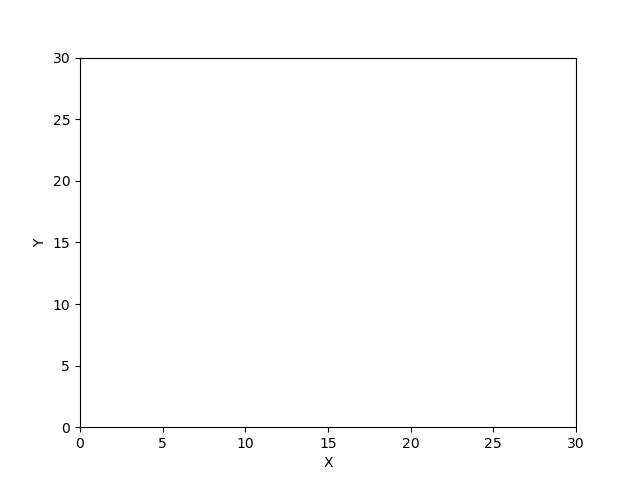

In [20]:
def update_lines(num, walk, line):
    line.set_data(walk[1][:10000*num], walk[0][:10000*num])
    return line

# Data: 40 random walks as (num_steps, 3) arrays
num_steps = macro.exp.macro_params.total_time_steps//10000
walk = float_track

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot()

# Create lines initially without data
line = ax.plot([])[0]

# Setting the axes properties
ax.set(xlim=(0, 30), xlabel='X')
ax.set(ylim=(0, 30), ylabel='Y')
#ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walk, line), interval=50)

plt.show()

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set(xlim=(0, 30), xlabel='X')
ax.set(ylim=(0, 30), ylabel='Y')
line = ax.plot([], [])[0]
#line.set_data(float_track[1][:1000], float_track[0][:1000])
update_lines(1000, float_track, line)
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'update_lines' is not defined

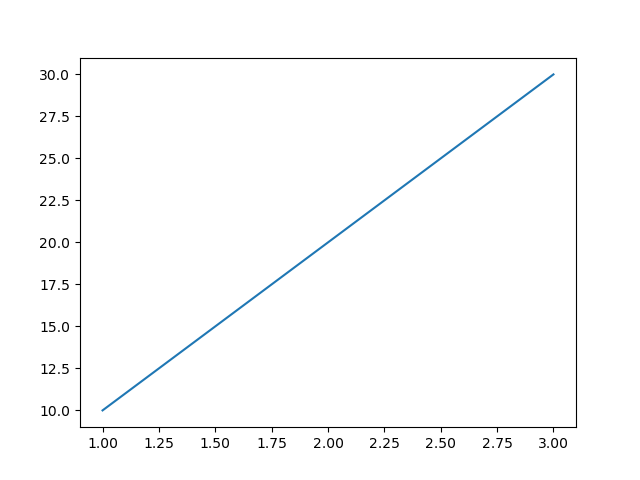

In [3]:
plt.plot([1,2,3],[10,20,30])

In [17]:
plt.clf()